In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from dvc.api import DVCFileSystem
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import scienceplots

plt.style.use(['science'])
plt.rcParams.update({
    "font.family": "serif",   # specify font family here
    "font.serif": ["Times"],  # specify font here
    "font.size":8,  # specify font size here
    "figure.figsize": [14/2.54, 7/2.54],
    "figure.dpi": 200.0
    })

# Forecasting line plots

In [8]:
periods_to_plot = [{"start": "2014-02-01", "end": "2014-02-07"},
                   {"start": "2014-03-01", "end": "2014-03-07"},
                   {"start": "2014-05-01", "end": "2014-05-07"},
                   {"start": "2014-07-01", "end": "2014-07-07"},
                   {"start": "2014-09-01", "end": "2014-09-07"},
                   {"start": "2014-11-01", "end": "2014-11-07"}]
    

In [4]:
experiments_to_plot = {
    "M-BiLSTM-ED-pvgis": {
        "label": "M-BiLSTM-ED-pvgis",
        "scatter_plot": True,
    },
    "LSTM-ED-pvgis": {
        "label": "LSTM-ED-pvgis",
        "scatter_plot": True,
    }
}

In [5]:
results_list = []

for exp_name, spec, in experiments_to_plot.items():
    fs = DVCFileSystem(url=".", rev=exp_name)
    with fs.open("data/prediction_results.pkl") as f:
        results = pd.read_pickle(f)
    # with fs.open("results_plot/daily_metrics.csv") as f:
    #     daily_metrics = pd.read_csv(f, index_col=0, parse_dates=True, date_format="%Y-%m-%d")
    #     print(f"Mean daily NRMSE: {daily_metrics['nrmse'].mean()}")

    results_list.append(results)

    predictions_df = pd.DataFrame({exp_name: result['predictions'] for exp_name, result in zip(experiments_to_plot.keys(), results_list)})
    min_index = predictions_df.index
    for result in results_list:
        min_index = min_index.intersection(result.index)

    # Trim all dataframes to the overlapping index
    predictions_df = predictions_df.loc[min_index]
    for exp_name, result in zip(experiments_to_plot.keys(), results_list):
        predictions_df[exp_name] = result.loc[min_index, 'predictions']

In [6]:
# Convert MJ/m² to W/m²
predictions_df *= 1e6 / 3600

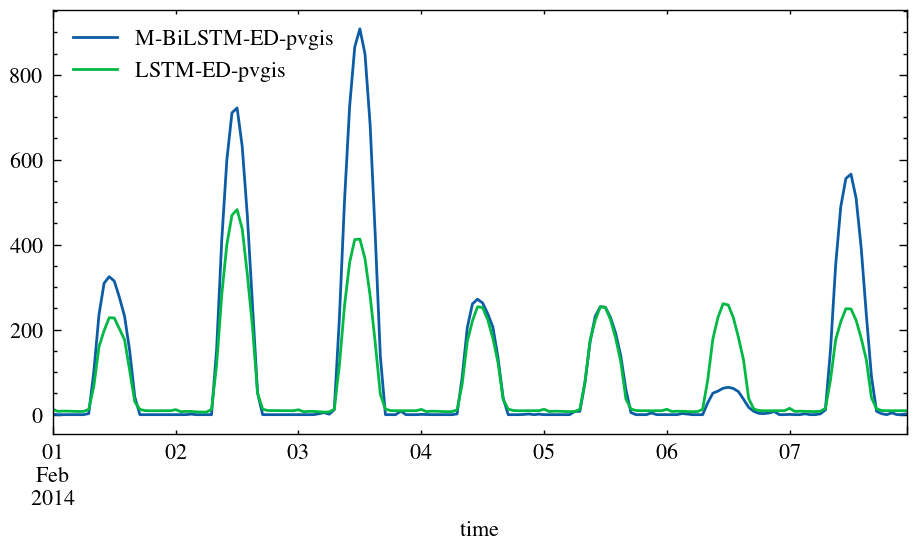

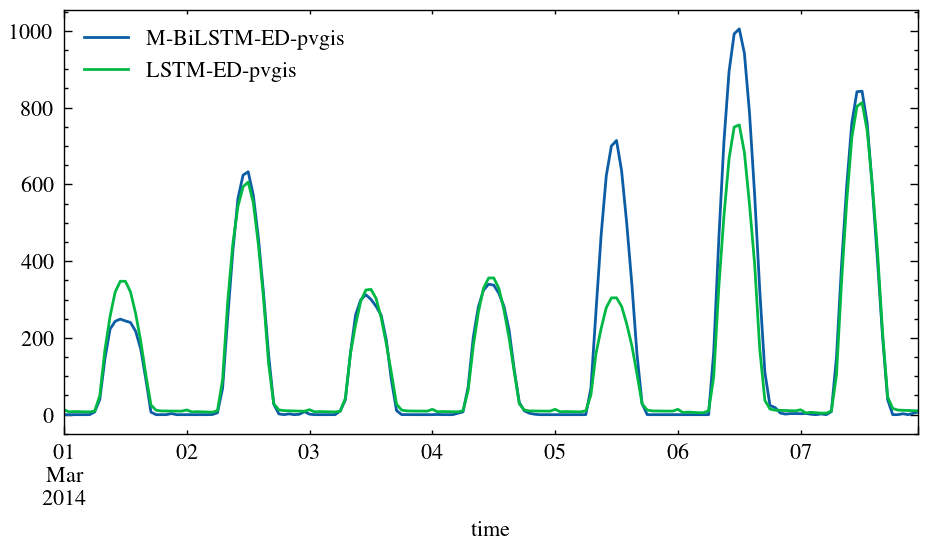

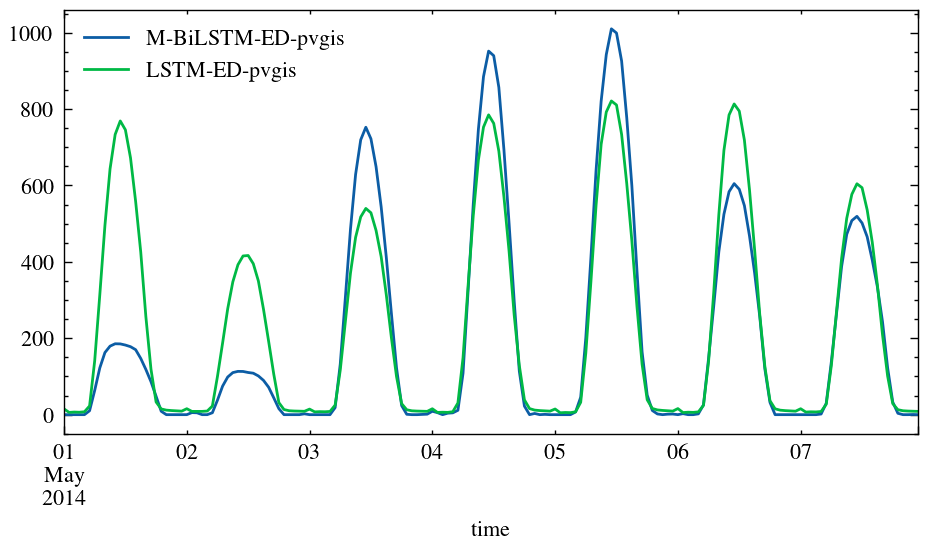

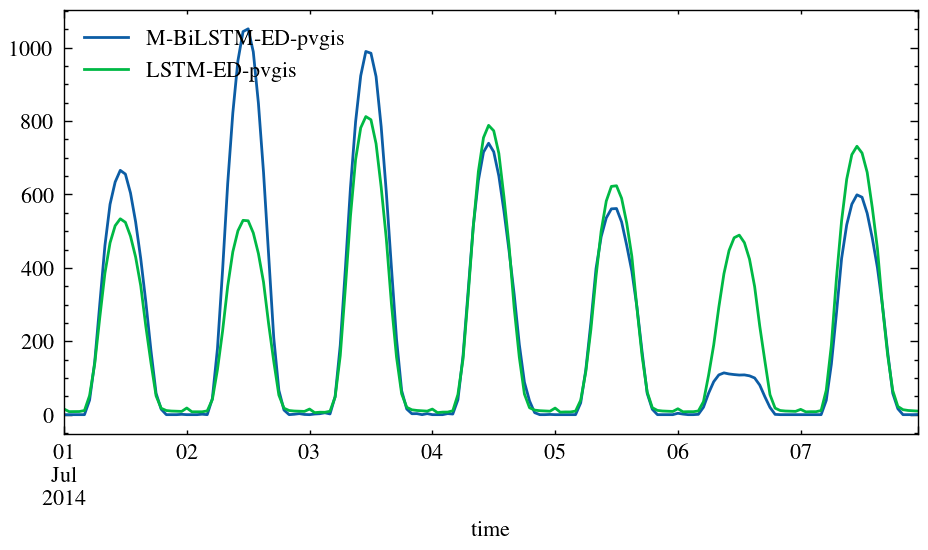

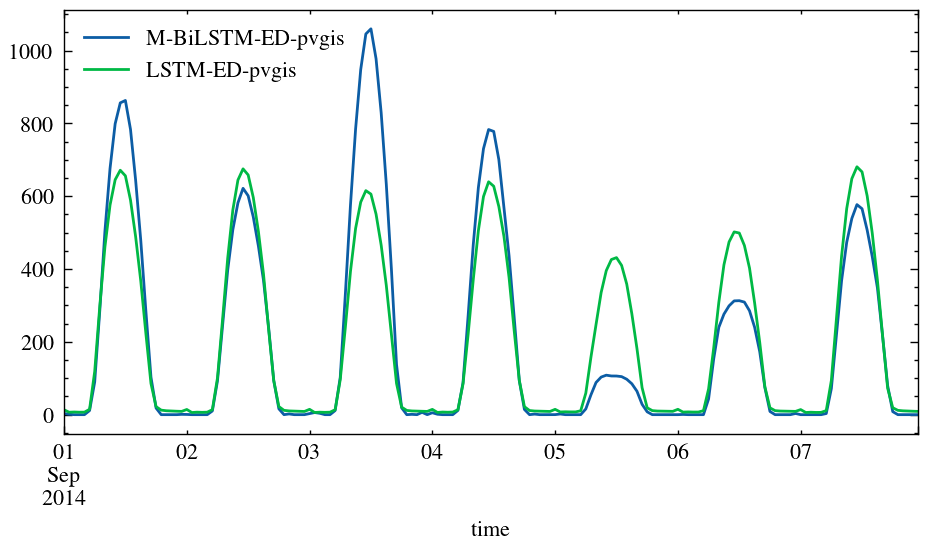

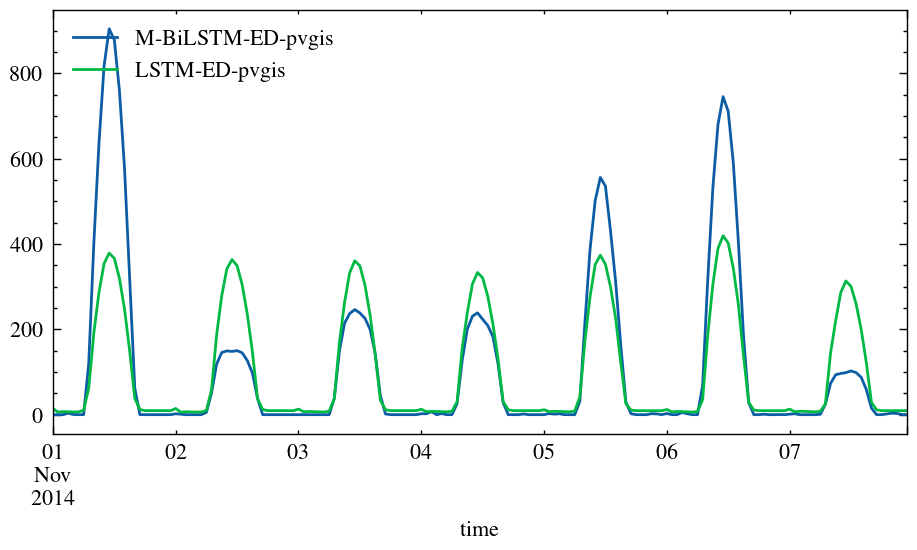

In [9]:
for period in periods_to_plot:
    start = period["start"]
    end = period["end"]
    ax = predictions_df.loc[start:end].plot()
    ax.legend([exp["label"] for exp in experiments_to_plot.values()] + ["observations"], loc="upper left")
    
    